In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df=pd.read_excel(r"C:\Users\assis\Downloads\1Mg_Homeopathic\Linear_Regression massai\Worksheet in _Budget_Allocation.xlsx")

In [5]:
df.describe()

,SELECTED_QTY,MAILED_COUNT,RESPONSE_COUNT,RESPONSE_SALES_AMT
count,2.360000e+03,2360.000000,2360.000000,2360.000000
mean,1.438556e+04,1361.769915,46.643644,10063.757712
std,1.165510e+05,2557.967184,111.125220,23826.166367
min,6.000000e+00,1.000000,0.000000,0.000000
25%,3.167500e+02,146.000000,3.000000,684.052500
50%,1.474000e+03,365.500000,12.000000,2642.230000
75%,6.698250e+03,1491.000000,43.000000,9875.657500
max,2.599002e+06,24341.000000,2541.000000,572875.430000


In [6]:
# Create Response Flag
df['RESPONSE_FLAG'] = df['RESPONSE_COUNT'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
# Response rate by group
response_by_group = df.groupby('TARGET_GROUP')['RESPONSE_FLAG'].mean()
print("\nResponse rate by Target Group:")
print(response_by_group)


Response rate by Target Group:
TARGET_GROUP
Control     0.854237
Targeted    0.991525
Name: RESPONSE_FLAG, dtype: float64


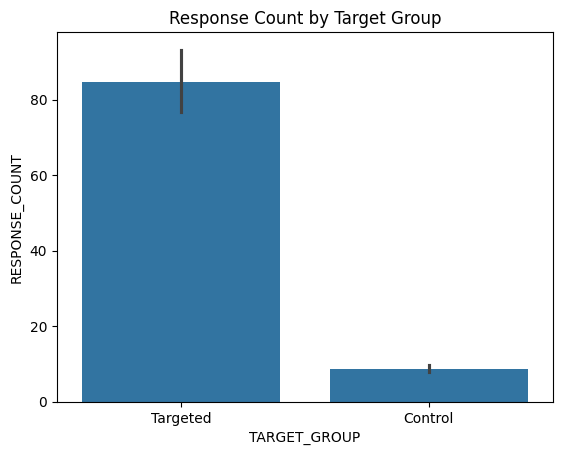

In [8]:
# Plotting
sns.barplot(data=df, x='TARGET_GROUP', y='RESPONSE_COUNT')
plt.title("Response Count by Target Group")
plt.show()

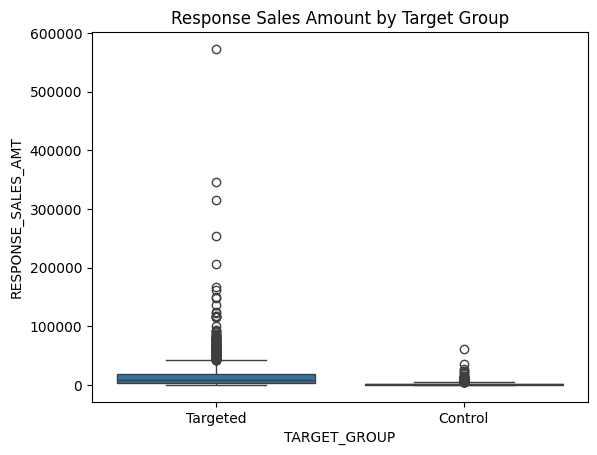

In [9]:
sns.boxplot(data=df, x='TARGET_GROUP', y='RESPONSE_SALES_AMT')
plt.title("Response Sales Amount by Target Group")
plt.show()

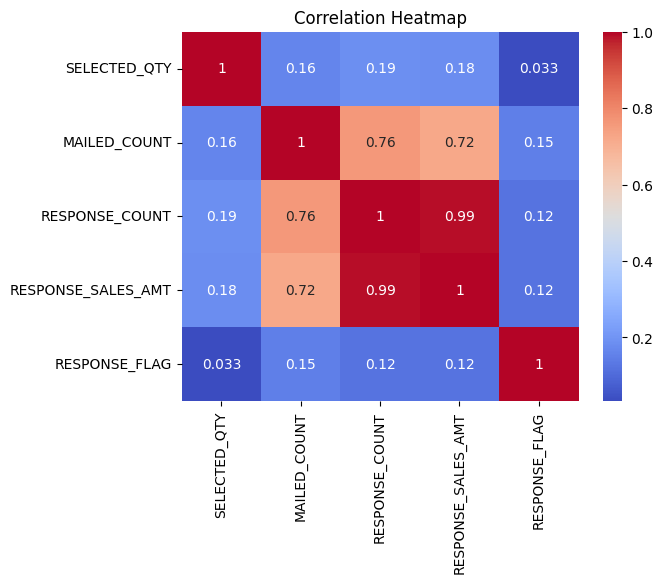

In [10]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# ------------------ Preprocessing ------------------
# Encode categorical features
cat_cols = ['PRDT TYPE', 'BRAND', 'MILESTONE', 'TARGET_GROUP', 'CAMPAIGN_MONTH', 'CUST_SEGMENT']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
# Features and Target
X = df.drop(columns=['RESPONSE_COUNT', 'RESPONSE_SALES_AMT', 'RESPONSE_FLAG'])
y = df['RESPONSE_FLAG']


In [13]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# ------------------ Modeling ------------------
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
print("\nLogistic Regression Report:")
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.44      0.58        39
           1       0.95      0.99      0.97       433

    accuracy                           0.95       472
   macro avg       0.90      0.71      0.77       472
weighted avg       0.94      0.95      0.94       472



In [15]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print("\nDecision Tree Report:")
y_pred_tree = tree_model.predict(X_test)
print(classification_report(y_test, y_pred_tree))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.60      0.38      0.47        39
           1       0.95      0.98      0.96       433

    accuracy                           0.93       472
   macro avg       0.77      0.68      0.72       472
weighted avg       0.92      0.93      0.92       472



In [16]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
print("\nXGBoost Report:")
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


XGBoost Report:
              precision    recall  f1-score   support

           0       0.85      0.44      0.58        39
           1       0.95      0.99      0.97       433

    accuracy                           0.95       472
   macro avg       0.90      0.71      0.77       472
weighted avg       0.94      0.95      0.94       472



c:\env\lib\site-packages\xgboost\training.py:183: UserWarning: [00:24:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


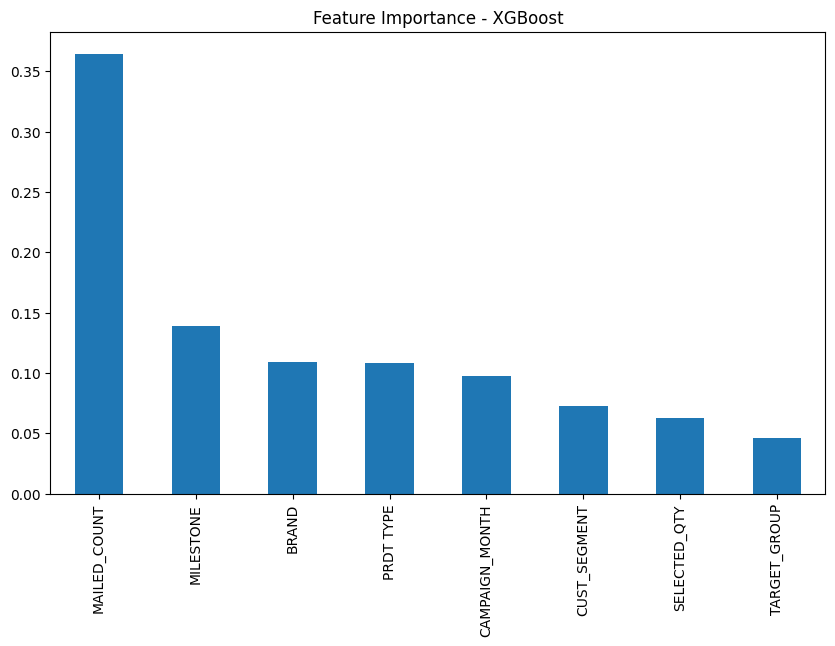

In [17]:
# Feature Importance
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Feature Importance - XGBoost")
plt.show()